<a href="https://colab.research.google.com/github/supatsara2002/bsc_dpdm22/blob/main/%5Bdataprep1%5Dproperty_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [335]:
import pandas as pd

In [336]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#สรุปข้อมูลของนักประเมินแต่ละคน โดยพิจารณาจาก ความมั่นใจในการประเมิน ประเมินราคาซื้อขาย ให้คะแนนทรัพย์

In [337]:
link = 'https://docs.google.com/spreadsheets/d/1Vg_8qdjOKV2p-oWYWiq3MZEKWB8gr8RYyLp4h49KG6A/export?foramt=xlsx'

##บ้าน

In [338]:
home = pd.read_excel(link, sheet_name='บ้าน')

In [339]:
home.head(2)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน


In [340]:
home.columns

Index(['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ปัจจัยในการประเมินราคาซื้อ-ขาย', 'เหตุผลไม่มั่นใจราคาประเมิน',
       'ให้คะแนนทรัพย์'],
      dtype='object')

In [341]:
home = home[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
home.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย               True
ให้คะแนนทรัพย์                    True
dtype: bool

In [342]:
home = home.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์'])
home.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

### นักประเมินคนที่ 1

In [343]:
est1 = home[home['ID ผู้ประเมิน']==1]
est1

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2200000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,5000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
6,1,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
8,1,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...
1209,1,https://nayoo.co/khonkaen/posts/6255,บ้านเดี่ยว,มั่นใจ,260000,550000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1211,1,https://nayoo.co/khonkaen/posts/6256,บ้านเดี่ยว,มั่นใจ,610000,700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1213,1,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1215,1,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,600000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [344]:
est1.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

In [345]:
est1.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,608.0,6.080000e+02,6.080000e+02
mean,1.0,3.350604e+06,3.241891e+06
std,0.0,4.939022e+06,4.696581e+06
min,1.0,2.600000e+05,2.200000e+05
25%,1.0,1.482500e+06,1.500000e+06
50%,1.0,2.540000e+06,2.500000e+06
75%,1.0,4.000000e+06,4.000000e+06
max,1.0,1.039350e+08,1.000000e+08


In [346]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [347]:
from matplotlib import pyplot as plt

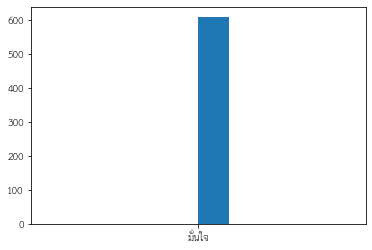

In [348]:
ret1_conf = plt.hist(est1['ความมั่นใจในการเมินราคาทรัพย์'])

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

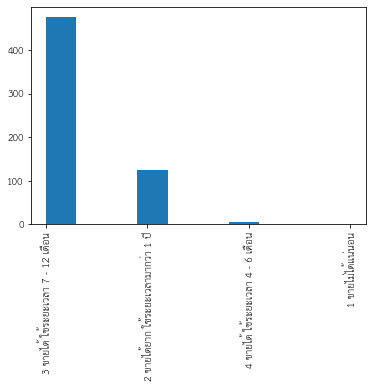

In [349]:
ret1_score = plt.hist(est1['ให้คะแนนทรัพย์'])
plt.xticks(rotation='vertical')

In [350]:
ret1_score

(array([475.,   0.,   0., 125.,   0.,   0.,   6.,   0.,   0.,   2.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

In [351]:
est1['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     475
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    125
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน        6
1 ขายไม่ได้แน่นอน                       2
Name: ให้คะแนนทรัพย์, dtype: int64

In [352]:
est1.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
1 ขายไม่ได้แน่นอน,2,2,2,2,2,2
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,125,125,125,125,125,125
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,475,475,475,475,475,475
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,6,6,6,6,6,6


In [353]:
est1[est1['ให้คะแนนทรัพย์']=='2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี'].count()

ID ผู้ประเมิน                    125
post id                          125
property_type                    125
ความมั่นใจในการเมินราคาทรัพย์    125
ราคาทรัพย์                       125
ประเมินราคาซื้อ-ขาย              125
ให้คะแนนทรัพย์                   125
dtype: int64

In [354]:
est1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    608
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

### นักประเมินคนที่ 2

In [355]:
est2 = home[home['ID ผู้ประเมิน']==2]
print(f'ประเมินทั้งหมด {len(est2)}')

ประเมินทั้งหมด 497


In [356]:
est2.describe()['ประเมินราคาซื้อ-ขาย']

count    4.970000e+02
mean     3.254326e+06
std      2.470357e+06
min      2.500000e+05
25%      1.890000e+06
50%      2.600000e+06
75%      4.200000e+06
max      2.200000e+07
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [357]:
est2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     365
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      117
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     14
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน       1
Name: ให้คะแนนทรัพย์, dtype: int64

In [358]:
est2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    497
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [359]:
est2 = est2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])

In [360]:
est2

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,9000000.0,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...
1208,2,https://nayoo.co/khonkaen/posts/6255,บ้านเดี่ยว,มั่นใจ,260000,300000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1210,2,https://nayoo.co/khonkaen/posts/6256,บ้านเดี่ยว,มั่นใจ,610000,500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1212,2,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,300000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1214,2,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [361]:
est2.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

##ที่ดิน

In [362]:
area = pd.read_excel(link,sheet_name='ที่ดิน')

In [363]:
area.head(2)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,1800000.0,"8,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [364]:
area = area[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
area.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย               True
ให้คะแนนทรัพย์                    True
dtype: bool

In [365]:
area = area.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์'])
area.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

### นักประเมินคนที่ 1

In [366]:
area1 = area[area['ID ผู้ประเมิน']==1]
print(f'ประเมินทั้งหมด {len(area1)}')

ประเมินทั้งหมด 98


In [367]:
area1.describe()['ประเมินราคาซื้อ-ขาย']

count    9.800000e+01
mean     8.572449e+06
std      2.329360e+07
min      5.000000e+05
25%      1.625000e+06
50%      3.075000e+06
75%      9.500000e+06
max      2.220000e+08
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [368]:
area1['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    53
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     45
Name: ให้คะแนนทรัพย์, dtype: int64

In [369]:
area1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    98
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

###นักประเมินคนที่ 2

In [370]:
area2 = area[area['ID ผู้ประเมิน']==2]
print(f'ประเมินทั้งหมด {len(area2)}')

ประเมินทั้งหมด 98


In [371]:
area2.describe()['ประเมินราคาซื้อ-ขาย']

count    9.800000e+01
mean     1.026990e+07
std      2.707792e+07
min      7.000000e+05
25%      1.800000e+06
50%      3.550000e+06
75%      9.750000e+06
max      2.500000e+08
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [372]:
area2['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    50
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     45
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       3
Name: ให้คะแนนทรัพย์, dtype: int64

In [373]:
area2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    98
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

##คอนโด

In [374]:
condo = pd.read_excel(link,sheet_name='คอนโด')

In [375]:
condo.head(2)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10
0,1,32.0,คอนโด,มั่นใจ,3500000,3500000.0,"60,000-130,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1,1,36.0,คอนโด,มั่นใจ,1930000,2200000.0,"50,000-90,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [376]:
condo = condo[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
condo.isnull().any()


ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

###นักประเมินคนที่ 1

In [377]:
cd1 = condo[condo['ID ผู้ประเมิน']==1]
print(f'ประเมินทั้งหมด {len(cd1)}')

ประเมินทั้งหมด 10


In [378]:
cd1.describe()['ประเมินราคาซื้อ-ขาย']

count    1.000000e+01
mean     2.275000e+06
std      6.705098e+05
min      1.500000e+06
25%      1.650000e+06
50%      2.250000e+06
75%      2.775000e+06
max      3.500000e+06
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [379]:
cd1['ให้คะแนนทรัพย์'].value_counts()

4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน     9
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน    1
Name: ให้คะแนนทรัพย์, dtype: int64

In [380]:
cd1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    10
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

###นักประเมินคนที่ 2

In [381]:
cd2 = condo[condo['ID ผู้ประเมิน']==2]
print(f'ประเมินทั้งหมด {len(cd2)}')

ประเมินทั้งหมด 0


##ทาวน์โฮม

In [382]:
townhome = pd.read_excel(link,sheet_name='ทาวน์โฮม')

In [383]:
townhome.head(2)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,120.0
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN


In [384]:
townhome = townhome[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
townhome.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

In [385]:
townhome = townhome.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์'])
townhome.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

###นักประเมินคนที่ 1

In [386]:
th1 = townhome[townhome['ID ผู้ประเมิน']==1]
print(f'ประเมินทั้งหมด {len(th1)}')

ประเมินทั้งหมด 120


In [387]:
th1.describe()['ประเมินราคาซื้อ-ขาย']

count    1.200000e+02
mean     1.832750e+06
std      8.027065e+05
min      3.500000e+05
25%      1.300000e+06
50%      1.600000e+06
75%      2.500000e+06
max      4.200000e+06
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [388]:
th1['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     100
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     14
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน        6
Name: ให้คะแนนทรัพย์, dtype: int64

In [389]:
th1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    120
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

###นักประเมินคนที่ 2

In [390]:
th2 = townhome[townhome['ID ผู้ประเมิน']==2]
print(f'ประเมินทั้งหมด {len(th2)}')

ประเมินทั้งหมด 120


In [391]:
th2.describe()['ประเมินราคาซื้อ-ขาย']

count    1.200000e+02
mean     1.823083e+06
std      7.744988e+05
min      4.000000e+05
25%      1.200000e+06
50%      1.700000e+06
75%      2.300000e+06
max      4.000000e+06
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [392]:
th2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     103
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี      7
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน        7
1 ขายไม่ได้แน่นอน                       2
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน       1
Name: ให้คะแนนทรัพย์, dtype: int64

In [393]:
th2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    120
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

##อาคารพาณิชย์

In [394]:
building = pd.read_excel(link,sheet_name='อาคารพาณิชย์')

In [395]:
building.head(2)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,6000000.0,"8,000-30,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน


In [396]:
building = building[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
building.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

###นักประเมินคนที่ 1

In [397]:
bd1 = building[building['ID ผู้ประเมิน']==1]
print(f'ประเมินทั้งหมด {len(bd1)}')

ประเมินทั้งหมด 91


In [398]:
bd1.describe()['ประเมินราคาซื้อ-ขาย']

count    9.100000e+01
mean     4.481319e+06
std      2.967487e+06
min      1.400000e+06
25%      2.700000e+06
50%      3.500000e+06
75%      5.200000e+06
max      1.700000e+07
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [399]:
bd1['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     47
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    42
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       2
Name: ให้คะแนนทรัพย์, dtype: int64

In [400]:
bd1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    91
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

###นักประเมินคนที่ 2

In [401]:
bd2 = building[building['ID ผู้ประเมิน']==2]
print(f'ประเมินทั้งหมด {len(bd2)}')

ประเมินทั้งหมด 91


In [402]:
bd2.describe()['ประเมินราคาซื้อ-ขาย']

count    9.100000e+01
mean     4.725275e+06
std      3.659253e+06
min      1.500000e+06
25%      2.700000e+06
50%      3.500000e+06
75%      5.000000e+06
max      2.400000e+07
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [403]:
bd2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     74
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      11
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     6
Name: ให้คะแนนทรัพย์, dtype: int64

In [404]:
bd2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    91
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

#เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์แต่ละทรัพย์ของนักประเมินแต่ละคนและของราคาตั้งขาย

ใช้ MAPE เป็นเกณฑ์ในการเปรียบเทียบ

hint เริ่มต้นมาเราอยากได้ตารางรูปแบบนี้ก่อน
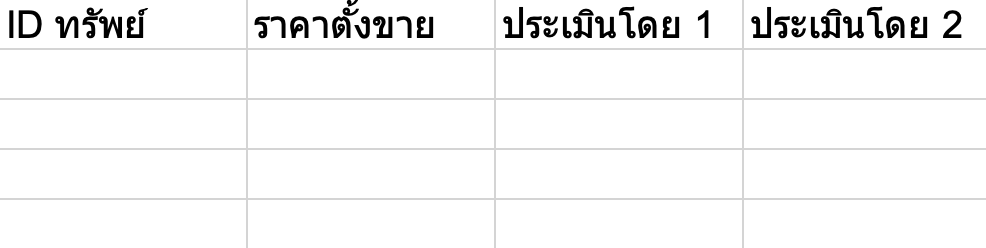

##ตารางประเมินบ้าน

In [405]:
est2['ประเมินโดยคนที่ 1'] = est2['post id'].map(est1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
est2.head(2)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดยคนที่ 1
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2500000.0
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0


In [406]:
est2.drop_duplicates(inplace=True)
est2.reset_index(drop=True,inplace=True)


In [407]:
est2['ประเมินโดยคนที่ 2'] = est2['post id'].map(est2.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
est2.head(2)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2
0,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2500000.0,2700000.0
1,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0,2400000.0


In [408]:
T_home = est2[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2']]
T_home

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2
0,https://nayoo.co/khonkaen/posts/25,2890000,2500000.0,2700000.0
1,https://nayoo.co/khonkaen/posts/33,2600000,2200000.0,2400000.0
2,https://nayoo.co/khonkaen/posts/495,6050000,5000000.0,9000000.0
3,https://nayoo.co/khonkaen/posts/564,4400000,3500000.0,3700000.0
4,https://nayoo.co/khonkaen/posts/566,2750000,2500000.0,2500000.0
...,...,...,...,...
482,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0
483,https://nayoo.co/khonkaen/posts/6256,610000,700000.0,500000.0
484,https://nayoo.co/khonkaen/posts/6257,295000,500000.0,300000.0
485,https://nayoo.co/khonkaen/posts/6258,615000,600000.0,500000.0


In [409]:
T_home.isnull().any()

post id              False
ราคาทรัพย์           False
ประเมินโดยคนที่ 1    False
ประเมินโดยคนที่ 2    False
dtype: bool

##ตารางประเมินที่ดิน

In [410]:
area2['ประเมินโดยคนที่ 1'] = area2['post id'].map(area1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
area2.head(2)

<ipython-input-410-fd89cfe77fb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area2['ประเมินโดยคนที่ 1'] = area2['post id'].map(area1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดยคนที่ 1
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1800000.0
3,2,https://nayoo.co/khonkaen/posts/11273,ที่ดิน,มั่นใจ,3999000,3000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2700000.0


In [411]:
area2['ประเมินโดยคนที่ 2'] = area2['post id'].map(area2.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
area2.head(2)

<ipython-input-411-10afbaf5386b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area2['ประเมินโดยคนที่ 2'] = area2['post id'].map(area2.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1800000.0,2000000.0
3,2,https://nayoo.co/khonkaen/posts/11273,ที่ดิน,มั่นใจ,3999000,3000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2700000.0,3000000.0


In [412]:
T_area = area2[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2']]
T_area

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0
3,https://nayoo.co/khonkaen/posts/11273,3999000,2700000.0,3000000.0
5,https://nayoo.co/khonkaen/posts/11550,4200000,4000000.0,4000000.0
7,https://nayoo.co/khonkaen/posts/12139,30000000,28000000.0,29000000.0
9,https://nayoo.co/khonkaen/posts/12250,2300000,2500000.0,2400000.0
...,...,...,...,...
196,https://nayoo.co/khonkaen/posts/9197,1200000,1800000.0,1500000.0
198,https://nayoo.co/khonkaen/posts/9589,16600000,12500000.0,16000000.0
200,https://nayoo.co/khonkaen/posts/9591,7998750,7000000.0,7500000.0
202,https://nayoo.co/khonkaen/posts/9598,3900000,4000000.0,4000000.0


In [413]:
T_area.isnull().any()

post id              False
ราคาทรัพย์           False
ประเมินโดยคนที่ 1    False
ประเมินโดยคนที่ 2    False
dtype: bool

##ตารางประเมินคอนโด

In [414]:
cd1.head(2)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,32.0,คอนโด,มั่นใจ,3500000,3500000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
1,1,36.0,คอนโด,มั่นใจ,1930000,2200000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน


In [415]:
cd1['ประเมินโดยคนที่ 1'] = cd1['post id'].map(cd1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
cd1.head(2)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดยคนที่ 1
0,1,32.0,คอนโด,มั่นใจ,3500000,3500000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,3500000.0
1,1,36.0,คอนโด,มั่นใจ,1930000,2200000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2200000.0


In [416]:
T_condo = cd1[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1']]
T_condo

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1
0,32.0,3500000,3500000.0
1,36.0,1930000,2200000.0
2,603.0,2438000,2800000.0
3,1395.0,1600000,2300000.0
4,1443.0,1860000,1800000.0
5,1609.0,1490000,1500000.0
6,1640.0,1280000,1600000.0
7,1641.0,4290000,2700000.0
8,1650.0,1700000,1550000.0
9,1840.0,3790000,2800000.0


In [417]:
T_condo.isnull().any()

post id              False
ราคาทรัพย์           False
ประเมินโดยคนที่ 1    False
dtype: bool

##ตารางประเมินทาวน์โฮม

In [418]:
th2['ประเมินโดยคนที่ 1'] = th2['post id'].map(th1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
th2.head(2)

<ipython-input-418-186fca2998a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  th2['ประเมินโดยคนที่ 1'] = th2['post id'].map(th1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดยคนที่ 1
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,1500000.0,1 ขายไม่ได้แน่นอน,700000.0
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000,1500000.0,1 ขายไม่ได้แน่นอน,700000.0


In [419]:
th2['ประเมินโดยคนที่ 2'] = th2['post id'].map(th2.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
th2.head(2)

<ipython-input-419-9f89c311f597>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  th2['ประเมินโดยคนที่ 2'] = th2['post id'].map(th2.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,1500000.0,1 ขายไม่ได้แน่นอน,700000.0,1500000.0
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000,1500000.0,1 ขายไม่ได้แน่นอน,700000.0,1500000.0


In [420]:
T_townhome = th2[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2']]
T_townhome

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2
1,https://nayoo.co/khonkaen/posts/548,1045000,700000.0,1500000.0
3,https://nayoo.co/khonkaen/posts/549,935000,700000.0,1500000.0
5,https://nayoo.co/khonkaen/posts/579,2520000,3500000.0,4000000.0
7,https://nayoo.co/khonkaen/posts/580,3850000,3500000.0,3200000.0
9,https://nayoo.co/khonkaen/posts/582,544000,1000000.0,800000.0
...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1105000,1000000.0,1200000.0
236,https://nayoo.co/khonkaen/posts/18551,1440000,1500000.0,1700000.0
237,https://nayoo.co/khonkaen/posts/19434,2000000,1600000.0,1900000.0
238,https://nayoo.co/khonkaen/posts/19501,1790000,1600000.0,1700000.0


In [421]:
T_townhome.isnull().any()

post id              False
ราคาทรัพย์           False
ประเมินโดยคนที่ 1    False
ประเมินโดยคนที่ 2    False
dtype: bool

##ตารางประเมินอาคารพาณิชย์

In [422]:
bd2['ประเมินโดยคนที่ 1'] = bd2['post id'].map(bd1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
bd2.head(2)

<ipython-input-422-f525d0ba3189>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bd2['ประเมินโดยคนที่ 1'] = bd2['post id'].map(bd1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดยคนที่ 1
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,8000000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,6000000.0
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,11400000,12000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,12000000.0


In [423]:
bd2['ประเมินโดยคนที่ 2'] = bd2['post id'].map(bd2.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
bd2.head(2)

<ipython-input-423-24f02066a52d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bd2['ประเมินโดยคนที่ 2'] = bd2['post id'].map(bd2.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,8000000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,6000000.0,8000000.0
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,11400000,12000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,12000000.0,12000000.0


In [424]:
T_building = bd2[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2']]
T_building

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2
1,https://nayoo.co/khonkaen/posts/6,6600000,6000000.0,8000000.0
3,https://nayoo.co/khonkaen/posts/17,11400000,12000000.0,12000000.0
5,https://nayoo.co/khonkaen/posts/21,22500000,13500000.0,20000000.0
7,https://nayoo.co/khonkaen/posts/22,3500000,4000000.0,4000000.0
9,https://nayoo.co/khonkaen/posts/24,3900000,2200000.0,3000000.0
...,...,...,...,...
173,https://nayoo.co/khonkaen/posts/6168,2652000,3000000.0,2700000.0
175,https://nayoo.co/khonkaen/posts/6169,3851000,3800000.0,4000000.0
177,https://nayoo.co/khonkaen/posts/6176,3410000,3200000.0,3500000.0
179,https://nayoo.co/khonkaen/posts/7137,3900000,3600000.0,4000000.0


In [425]:
T_building.isnull().any()

post id              False
ราคาทรัพย์           False
ประเมินโดยคนที่ 1    False
ประเมินโดยคนที่ 2    False
dtype: bool

## ค่า **MAPE**

In [426]:
from sklearn.metrics import mean_absolute_percentage_error

###บ้าน

In [427]:
h = T_home['ราคาทรัพย์']
h_1 = T_home['ประเมินโดยคนที่ 1']
h_2 = T_home['ประเมินโดยคนที่ 2']

In [428]:
mean_absolute_percentage_error(h,h_1 )
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์ของบ้าน และ ราคาของผู้ประเมินคนที่ 1 เท่ากับ {mean_absolute_percentage_error(h,h_1 )*100:,.2f}')

ค่า MAPE ระหว่าง ราคาทรัพย์ของบ้าน และ ราคาของผู้ประเมินคนที่ 1 เท่ากับ 11.67


In [429]:
mean_absolute_percentage_error(h,h_2 )
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์ของบ้าน และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ {mean_absolute_percentage_error(h,h_2 )*100:,.2f}')

ค่า MAPE ระหว่าง ราคาทรัพย์ของบ้าน และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ 10.05


In [430]:
mean_absolute_percentage_error(h_1,h_2 )
print(f'ค่า MAPE ระหว่าง ราคาของผู้ประเมินคนที่ 1 และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ {mean_absolute_percentage_error(h_1,h_2 )*100:,.2f}')

ค่า MAPE ระหว่าง ราคาของผู้ประเมินคนที่ 1 และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ 12.83


###ที่ดิน

In [431]:
A = T_area['ราคาทรัพย์']
A_1 = T_area['ประเมินโดยคนที่ 1']
A_2 = T_area['ประเมินโดยคนที่ 2']

In [432]:
mean_absolute_percentage_error(A,A_1 )
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์ของที่ดิน และ ราคาของผู้ประเมินคนที่ 1 เท่ากับ {mean_absolute_percentage_error(A,A_1 )*100:,.2f}')

ค่า MAPE ระหว่าง ราคาทรัพย์ของที่ดิน และ ราคาของผู้ประเมินคนที่ 1 เท่ากับ 28.54


In [433]:
mean_absolute_percentage_error(A,A_2 )
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์ของที่ดิน และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ {mean_absolute_percentage_error(A,A_2 )*100:,.2f}')

ค่า MAPE ระหว่าง ราคาทรัพย์ของที่ดิน และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ 19.71


In [434]:
mean_absolute_percentage_error(A_1,A_2 )
print(f'ค่า MAPE ระหว่าง ราคาของผู้ประเมินคนที่ 1 และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ {mean_absolute_percentage_error(A_1,A_2 )*100:,.2f}')

ค่า MAPE ระหว่าง ราคาของผู้ประเมินคนที่ 1 และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ 38.26


###คอนโด

In [435]:
CD = T_condo['ราคาทรัพย์']
cd_1 = T_condo['ประเมินโดยคนที่ 1']

In [436]:
mean_absolute_percentage_error(CD,cd_1 )
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์ของคอนโด และ ราคาของผู้ประเมินคนที่ 1 เท่ากับ {mean_absolute_percentage_error(CD,cd_1 )*100:,.2f}')

ค่า MAPE ระหว่าง ราคาทรัพย์ของคอนโด และ ราคาของผู้ประเมินคนที่ 1 เท่ากับ 17.35


###ทาวน์โฮม

In [437]:
TH = T_townhome['ราคาทรัพย์']
th_1 = T_townhome['ประเมินโดยคนที่ 1']
th_2 = T_townhome['ประเมินโดยคนที่ 2']

In [438]:
mean_absolute_percentage_error(TH,th_1 )
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์ของทาวน์โฮม และ ราคาของผู้ประเมินคนที่ 1 เท่ากับ {mean_absolute_percentage_error(TH,th_1 )*100:,.2f}')

ค่า MAPE ระหว่าง ราคาทรัพย์ของทาวน์โฮม และ ราคาของผู้ประเมินคนที่ 1 เท่ากับ 11.57


In [439]:
mean_absolute_percentage_error(TH,th_2 )
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์ของทาวน์โฮม และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ {mean_absolute_percentage_error(TH,th_2 )*100:,.2f}')

ค่า MAPE ระหว่าง ราคาทรัพย์ของทาวน์โฮม และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ 9.26


In [440]:
mean_absolute_percentage_error(th_1,th_2 )
print(f'ค่า MAPE ระหว่าง ราคาของผู้ประเมินคนที่ 1 และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ {mean_absolute_percentage_error(th_1,th_2 )*100:,.2f}')

ค่า MAPE ระหว่าง ราคาของผู้ประเมินคนที่ 1 และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ 11.21


###อาคารพาณิชย์

In [441]:
BD = T_building['ราคาทรัพย์']
bd_1 = T_building['ประเมินโดยคนที่ 1']
bd_2 = T_building['ประเมินโดยคนที่ 2']

In [442]:
mean_absolute_percentage_error(BD,bd_1 )
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์ของอาคารพาณิชย์ และ ราคาของผู้ประเมินคนที่ 1 เท่ากับ {mean_absolute_percentage_error(BD,bd_1 )*100:,.2f}')

ค่า MAPE ระหว่าง ราคาทรัพย์ของอาคารพาณิชย์ และ ราคาของผู้ประเมินคนที่ 1 เท่ากับ 11.76


##เขียน function ตารางสอบค่าที่เติม 0 ผิด

In [443]:
max(10,2)

10

In [444]:
def check_v(in1,in2):
    return max(in1/in2,in2/in1)

In [445]:
check_v(100,12)

8.333333333333334

In [446]:
check_v(100,1200)

12.0

In [447]:
T_home

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2
0,https://nayoo.co/khonkaen/posts/25,2890000,2500000.0,2700000.0
1,https://nayoo.co/khonkaen/posts/33,2600000,2200000.0,2400000.0
2,https://nayoo.co/khonkaen/posts/495,6050000,5000000.0,9000000.0
3,https://nayoo.co/khonkaen/posts/564,4400000,3500000.0,3700000.0
4,https://nayoo.co/khonkaen/posts/566,2750000,2500000.0,2500000.0
...,...,...,...,...
482,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0
483,https://nayoo.co/khonkaen/posts/6256,610000,700000.0,500000.0
484,https://nayoo.co/khonkaen/posts/6257,295000,500000.0,300000.0
485,https://nayoo.co/khonkaen/posts/6258,615000,600000.0,500000.0


In [448]:
check1 = list()
for row in T_home.iterrows():
    check1.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดยคนที่ 1']))
check1

[1.156,
 1.1818181818181819,
 1.21,
 1.2571428571428571,
 1.1,
 1.271111111111111,
 1.36,
 1.0153846153846153,
 1.3684,
 1.031941031941032,
 1.0476190476190477,
 1.1785714285714286,
 1.0592592592592593,
 1.188,
 1.1275,
 1.1,
 1.1157142857142857,
 1.0371428571428571,
 1.0588235294117647,
 1.2571428571428571,
 1.13125,
 1.0,
 1.0888888888888888,
 1.0892333472978635,
 1.0444444444444445,
 1.0,
 1.0434782608695652,
 1.02,
 1.25,
 1.13,
 1.0714285714285714,
 1.0,
 1.0,
 1.3833333333333333,
 1.03125,
 1.1611111111111112,
 1.0526315789473684,
 1.5384615384615385,
 1.0227272727272727,
 1.1363636363636365,
 1.1111111111111112,
 1.1290322580645162,
 1.1388888888888888,
 1.0,
 1.24,
 1.3093125,
 1.21,
 1.0123636363636364,
 1.0692857142857144,
 1.0158013544018059,
 1.4685314685314685,
 1.1777777777777778,
 1.1942857142857144,
 1.0714285714285714,
 1.0710526315789475,
 1.036,
 1.046,
 1.09375,
 1.2140833670578712,
 1.1090909090909091,
 1.1333333333333333,
 1.1866666666666668,
 1.036,
 1.0031347962

In [449]:
T_home ['check1'] = check1
T_home

<ipython-input-449-0673d38470e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_home ['check1'] = check1


,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,check1
0,https://nayoo.co/khonkaen/posts/25,2890000,2500000.0,2700000.0,1.156000
1,https://nayoo.co/khonkaen/posts/33,2600000,2200000.0,2400000.0,1.181818
2,https://nayoo.co/khonkaen/posts/495,6050000,5000000.0,9000000.0,1.210000
3,https://nayoo.co/khonkaen/posts/564,4400000,3500000.0,3700000.0,1.257143
4,https://nayoo.co/khonkaen/posts/566,2750000,2500000.0,2500000.0,1.100000
...,...,...,...,...,...
482,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0,2.115385
483,https://nayoo.co/khonkaen/posts/6256,610000,700000.0,500000.0,1.147541
484,https://nayoo.co/khonkaen/posts/6257,295000,500000.0,300000.0,1.694915
485,https://nayoo.co/khonkaen/posts/6258,615000,600000.0,500000.0,1.025000


In [450]:
T_home['check2']= T_home.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 2']),axis=1)
T_home

<ipython-input-450-aada5356b165>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_home['check2']= T_home.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 2']),axis=1)


,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,check1,check2
0,https://nayoo.co/khonkaen/posts/25,2890000,2500000.0,2700000.0,1.156000,1.070370
1,https://nayoo.co/khonkaen/posts/33,2600000,2200000.0,2400000.0,1.181818,1.083333
2,https://nayoo.co/khonkaen/posts/495,6050000,5000000.0,9000000.0,1.210000,1.487603
3,https://nayoo.co/khonkaen/posts/564,4400000,3500000.0,3700000.0,1.257143,1.189189
4,https://nayoo.co/khonkaen/posts/566,2750000,2500000.0,2500000.0,1.100000,1.100000
...,...,...,...,...,...,...
482,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0,2.115385,1.153846
483,https://nayoo.co/khonkaen/posts/6256,610000,700000.0,500000.0,1.147541,1.220000
484,https://nayoo.co/khonkaen/posts/6257,295000,500000.0,300000.0,1.694915,1.016949
485,https://nayoo.co/khonkaen/posts/6258,615000,600000.0,500000.0,1.025000,1.230000


In [451]:
T_home.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,check1,check2
427,https://nayoo.co/khonkaen/posts/6037,1450000,3500000.0,3000000.0,2.413793,2.068966
97,https://nayoo.co/khonkaen/posts/525,1933000,830000.0,2200000.0,2.328916,1.138127
482,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0,2.115385,1.153846
308,https://nayoo.co/khonkaen/posts/2321,465000,900000.0,400000.0,1.935484,1.162500
303,https://nayoo.co/khonkaen/posts/2315,260000,500000.0,250000.0,1.923077,1.040000
...,...,...,...,...,...,...
220,https://nayoo.co/khonkaen/posts/1557,1800000,1800000.0,1700000.0,1.000000,1.058824
416,https://nayoo.co/khonkaen/posts/6006,3600000,3600000.0,3700000.0,1.000000,1.027778
87,https://nayoo.co/khonkaen/posts/31,4000000,4000000.0,3900000.0,1.000000,1.025641
77,https://nayoo.co/khonkaen/posts/19475,3300000,3300000.0,3600000.0,1.000000,1.090909


In [452]:
T_home.sort_values(by=['check2'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,check1,check2
37,https://nayoo.co/khonkaen/posts/1,390000,600000.0,1300000.0,1.538462,3.333333
427,https://nayoo.co/khonkaen/posts/6037,1450000,3500000.0,3000000.0,2.413793,2.068966
277,https://nayoo.co/khonkaen/posts/2274,595000,700000.0,1000000.0,1.176471,1.680672
472,https://nayoo.co/khonkaen/posts/6131,1330000,1400000.0,2200000.0,1.052632,1.654135
471,https://nayoo.co/khonkaen/posts/6129,1235000,2300000.0,2000000.0,1.862348,1.619433
...,...,...,...,...,...,...
379,https://nayoo.co/khonkaen/posts/3978,2350000,2200000.0,2350000.0,1.068182,1.000000
34,https://nayoo.co/khonkaen/posts/2262,3200000,3300000.0,3200000.0,1.031250,1.000000
381,https://nayoo.co/khonkaen/posts/3982,2350000,2300000.0,2350000.0,1.021739,1.000000
456,https://nayoo.co/khonkaen/posts/6096,2200000,2200000.0,2200000.0,1.000000,1.000000


In [453]:
land = T_area[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2']]
land['checkL1']= land.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 1']),axis=1)
land['checkL2']= land.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 2']),axis=1)
land

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,checkL1,checkL2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0,1.555556,1.400000
3,https://nayoo.co/khonkaen/posts/11273,3999000,2700000.0,3000000.0,1.481111,1.333000
5,https://nayoo.co/khonkaen/posts/11550,4200000,4000000.0,4000000.0,1.050000,1.050000
7,https://nayoo.co/khonkaen/posts/12139,30000000,28000000.0,29000000.0,1.071429,1.034483
9,https://nayoo.co/khonkaen/posts/12250,2300000,2500000.0,2400000.0,1.086957,1.043478
...,...,...,...,...,...,...
196,https://nayoo.co/khonkaen/posts/9197,1200000,1800000.0,1500000.0,1.500000,1.250000
198,https://nayoo.co/khonkaen/posts/9589,16600000,12500000.0,16000000.0,1.328000,1.037500
200,https://nayoo.co/khonkaen/posts/9591,7998750,7000000.0,7500000.0,1.142679,1.066500
202,https://nayoo.co/khonkaen/posts/9598,3900000,4000000.0,4000000.0,1.025641,1.025641


In [454]:
land.sort_values(by=['checkL1'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,checkL1,checkL2
21,https://nayoo.co/khonkaen/posts/13702,90000000,4500000.0,7500000.0,20.000000,12.000000
61,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0,5.000000,1.285714
68,https://nayoo.co/khonkaen/posts/18194,5739000,1200000.0,4500000.0,4.782500,1.275333
87,https://nayoo.co/khonkaen/posts/2007,16500000,3500000.0,13000000.0,4.714286,1.269231
35,https://nayoo.co/khonkaen/posts/1639,3000000,12000000.0,3500000.0,4.000000,1.166667
...,...,...,...,...,...,...
202,https://nayoo.co/khonkaen/posts/9598,3900000,4000000.0,4000000.0,1.025641,1.025641
124,https://nayoo.co/khonkaen/posts/3447,980000,1000000.0,800000.0,1.020408,1.225000
37,https://nayoo.co/khonkaen/posts/1663,1485000,1500000.0,1200000.0,1.010101,1.237500
29,https://nayoo.co/khonkaen/posts/1599,2500000,2500000.0,2200000.0,1.000000,1.136364


In [455]:
land.sort_values(by=['checkL2'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,checkL1,checkL2
21,https://nayoo.co/khonkaen/posts/13702,90000000,4500000.0,7500000.0,20.000000,12.000000
122,https://nayoo.co/khonkaen/posts/3341,1700000,1600000.0,9000000.0,1.062500,5.294118
115,https://nayoo.co/khonkaen/posts/3219,4500000,4000000.0,1600000.0,1.125000,2.812500
161,https://nayoo.co/khonkaen/posts/7721,1350000,1000000.0,700000.0,1.350000,1.928571
137,https://nayoo.co/khonkaen/posts/3601,2300000,1900000.0,1200000.0,1.210526,1.916667
...,...,...,...,...,...,...
77,https://nayoo.co/khonkaen/posts/1921,8080000,2800000.0,8000000.0,2.885714,1.010000
15,https://nayoo.co/khonkaen/posts/12607,7990000,10000000.0,8000000.0,1.251564,1.001252
31,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0,1.500000,1.000000
121,https://nayoo.co/khonkaen/posts/3305,14000000,12000000.0,14000000.0,1.166667,1.000000


In [456]:
Condo = T_condo[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1']]
Condo['checkC1']= Condo.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 1']),axis=1)
Condo

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,checkC1
0,32.0,3500000,3500000.0,1.000000
1,36.0,1930000,2200000.0,1.139896
2,603.0,2438000,2800000.0,1.148482
3,1395.0,1600000,2300000.0,1.437500
4,1443.0,1860000,1800000.0,1.033333
5,1609.0,1490000,1500000.0,1.006711
6,1640.0,1280000,1600000.0,1.250000
7,1641.0,4290000,2700000.0,1.588889
8,1650.0,1700000,1550000.0,1.096774
9,1840.0,3790000,2800000.0,1.353571


In [457]:
Condo.sort_values(by=['checkC1'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,checkC1
7,1641.0,4290000,2700000.0,1.588889
3,1395.0,1600000,2300000.0,1.437500
9,1840.0,3790000,2800000.0,1.353571
6,1640.0,1280000,1600000.0,1.250000
2,603.0,2438000,2800000.0,1.148482
1,36.0,1930000,2200000.0,1.139896
8,1650.0,1700000,1550000.0,1.096774
4,1443.0,1860000,1800000.0,1.033333
5,1609.0,1490000,1500000.0,1.006711
0,32.0,3500000,3500000.0,1.000000


In [458]:
TownH = T_townhome[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2']]
TownH['checkTH1']= TownH.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 1']),axis=1)
TownH['checkTH2']= TownH.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 2']),axis=1)
TownH

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,checkTH1,checkTH2
1,https://nayoo.co/khonkaen/posts/548,1045000,700000.0,1500000.0,1.492857,1.435407
3,https://nayoo.co/khonkaen/posts/549,935000,700000.0,1500000.0,1.335714,1.604278
5,https://nayoo.co/khonkaen/posts/579,2520000,3500000.0,4000000.0,1.388889,1.587302
7,https://nayoo.co/khonkaen/posts/580,3850000,3500000.0,3200000.0,1.100000,1.203125
9,https://nayoo.co/khonkaen/posts/582,544000,1000000.0,800000.0,1.838235,1.470588
...,...,...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1105000,1000000.0,1200000.0,1.105000,1.085973
236,https://nayoo.co/khonkaen/posts/18551,1440000,1500000.0,1700000.0,1.041667,1.180556
237,https://nayoo.co/khonkaen/posts/19434,2000000,1600000.0,1900000.0,1.250000,1.052632
238,https://nayoo.co/khonkaen/posts/19501,1790000,1600000.0,1700000.0,1.118750,1.052941


In [459]:
TownH.sort_values(by=['checkTH1'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,checkTH1,checkTH2
176,https://nayoo.co/khonkaen/posts/3528,2190000,350000.0,400000.0,6.257143,5.475000
9,https://nayoo.co/khonkaen/posts/582,544000,1000000.0,800000.0,1.838235,1.470588
206,https://nayoo.co/khonkaen/posts/17507,1085000,650000.0,700000.0,1.669231,1.550000
216,https://nayoo.co/khonkaen/posts/17535,840000,1300000.0,1000000.0,1.547619,1.190476
1,https://nayoo.co/khonkaen/posts/548,1045000,700000.0,1500000.0,1.492857,1.435407
...,...,...,...,...,...,...
162,https://nayoo.co/khonkaen/posts/2242,1610000,1600000.0,1600000.0,1.006250,1.006250
228,https://nayoo.co/khonkaen/posts/17923,1990000,2000000.0,2200000.0,1.005025,1.105528
167,https://nayoo.co/khonkaen/posts/2829,2490000,2500000.0,2300000.0,1.004016,1.082609
200,https://nayoo.co/khonkaen/posts/13411,3200000,3200000.0,3200000.0,1.000000,1.000000


In [460]:
TownH.sort_values(by=['checkTH2'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,checkTH1,checkTH2
176,https://nayoo.co/khonkaen/posts/3528,2190000,350000.0,400000.0,6.257143,5.475000
234,https://nayoo.co/khonkaen/posts/18090,2850000,2800000.0,1500000.0,1.017857,1.900000
3,https://nayoo.co/khonkaen/posts/549,935000,700000.0,1500000.0,1.335714,1.604278
5,https://nayoo.co/khonkaen/posts/579,2520000,3500000.0,4000000.0,1.388889,1.587302
206,https://nayoo.co/khonkaen/posts/17507,1085000,650000.0,700000.0,1.669231,1.550000
...,...,...,...,...,...,...
202,https://nayoo.co/khonkaen/posts/15111,2200000,2500000.0,2200000.0,1.136364,1.000000
209,https://nayoo.co/khonkaen/posts/17511,1700000,1500000.0,1700000.0,1.133333,1.000000
212,https://nayoo.co/khonkaen/posts/17516,1800000,1700000.0,1800000.0,1.058824,1.000000
213,https://nayoo.co/khonkaen/posts/17518,1200000,1100000.0,1200000.0,1.090909,1.000000


In [461]:
Build = T_building[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2']]
Build['checkB1']= Build.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 1']),axis=1)
Build['checkB2']= Build.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 2']),axis=1)
Build

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,checkB1,checkB2
1,https://nayoo.co/khonkaen/posts/6,6600000,6000000.0,8000000.0,1.100000,1.212121
3,https://nayoo.co/khonkaen/posts/17,11400000,12000000.0,12000000.0,1.052632,1.052632
5,https://nayoo.co/khonkaen/posts/21,22500000,13500000.0,20000000.0,1.666667,1.125000
7,https://nayoo.co/khonkaen/posts/22,3500000,4000000.0,4000000.0,1.142857,1.142857
9,https://nayoo.co/khonkaen/posts/24,3900000,2200000.0,3000000.0,1.772727,1.300000
...,...,...,...,...,...,...
173,https://nayoo.co/khonkaen/posts/6168,2652000,3000000.0,2700000.0,1.131222,1.018100
175,https://nayoo.co/khonkaen/posts/6169,3851000,3800000.0,4000000.0,1.013421,1.038691
177,https://nayoo.co/khonkaen/posts/6176,3410000,3200000.0,3500000.0,1.065625,1.026393
179,https://nayoo.co/khonkaen/posts/7137,3900000,3600000.0,4000000.0,1.083333,1.025641


In [462]:
Build.sort_values(by=['checkB1'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,checkB1,checkB2
9,https://nayoo.co/khonkaen/posts/24,3900000,2200000.0,3000000.0,1.772727,1.300000
5,https://nayoo.co/khonkaen/posts/21,22500000,13500000.0,20000000.0,1.666667,1.125000
159,https://nayoo.co/khonkaen/posts/6043,2240000,3500000.0,3000000.0,1.562500,1.339286
87,https://nayoo.co/khonkaen/posts/707,1450000,2200000.0,3200000.0,1.517241,2.206897
81,https://nayoo.co/khonkaen/posts/701,1925000,2700000.0,2000000.0,1.402597,1.038961
...,...,...,...,...,...,...
61,https://nayoo.co/khonkaen/posts/643,4180000,4200000.0,4200000.0,1.004785,1.004785
65,https://nayoo.co/khonkaen/posts/651,2200000,2200000.0,2000000.0,1.000000,1.100000
151,https://nayoo.co/khonkaen/posts/5995,3000000,3000000.0,6000000.0,1.000000,2.000000
167,https://nayoo.co/khonkaen/posts/6123,2200000,2200000.0,2200000.0,1.000000,1.000000


In [463]:
Build.sort_values(by=['checkB2'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,checkB1,checkB2
153,https://nayoo.co/khonkaen/posts/6009,2250000,2700000.0,5000000.0,1.200000,2.222222
87,https://nayoo.co/khonkaen/posts/707,1450000,2200000.0,3200000.0,1.517241,2.206897
151,https://nayoo.co/khonkaen/posts/5995,3000000,3000000.0,6000000.0,1.000000,2.000000
49,https://nayoo.co/khonkaen/posts/602,2520000,3300000.0,3500000.0,1.309524,1.388889
159,https://nayoo.co/khonkaen/posts/6043,2240000,3500000.0,3000000.0,1.562500,1.339286
...,...,...,...,...,...,...
117,https://nayoo.co/khonkaen/posts/2180,5000000,4000000.0,5000000.0,1.250000,1.000000
105,https://nayoo.co/khonkaen/posts/1885,3500000,3400000.0,3500000.0,1.029412,1.000000
103,https://nayoo.co/khonkaen/posts/1858,1500000,2000000.0,1500000.0,1.333333,1.000000
97,https://nayoo.co/khonkaen/posts/1614,2500000,2700000.0,2500000.0,1.080000,1.000000


#HW2 แก้ไข ข้อมูลแล้วคำนวณ MAPE ใหม่อีกรอบมาเทียบกัน

In [464]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE

## บ้าน

In [465]:
est1

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2200000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,5000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
6,1,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
8,1,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...
1209,1,https://nayoo.co/khonkaen/posts/6255,บ้านเดี่ยว,มั่นใจ,260000,550000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1211,1,https://nayoo.co/khonkaen/posts/6256,บ้านเดี่ยว,มั่นใจ,610000,700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1213,1,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1215,1,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,600000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [466]:
est2

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2
0,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2500000.0,2700000.0
1,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0,2400000.0
2,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,9000000.0,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,5000000.0,9000000.0
3,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3500000.0,3700000.0
4,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2500000.0,2500000.0
...,...,...,...,...,...,...,...,...,...
482,2,https://nayoo.co/khonkaen/posts/6255,บ้านเดี่ยว,มั่นใจ,260000,300000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,550000.0,300000.0
483,2,https://nayoo.co/khonkaen/posts/6256,บ้านเดี่ยว,มั่นใจ,610000,500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,700000.0,500000.0
484,2,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,300000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,500000.0,300000.0
485,2,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,600000.0,500000.0


In [467]:
est1MAPE = MAPE(est1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(est1['ราคาทรัพย์']))
est2MAPE = MAPE(est2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(est2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ บ้าน\nนักประเมิน คนที่ 1 = {est1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {est2MAPE*100:.2f}%')
est2['ประเมินโดยคนที่ 1'] = est2['post id'].map(est1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
est2_d = est2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดยคนที่ 1','ราคาทรัพย์'])
one2two = MAPE(est2_d['ประเมินราคาซื้อ-ขาย'],est2_d['ประเมินโดยคนที่ 1'])
two2one = MAPE(est2_d['ประเมินโดยคนที่ 1'],est2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง 2 = {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(est2_d)} ทรัพย์')
     

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ บ้าน
นักประเมิน คนที่ 1 = 12.97%
นักประเมิน คนที่ 2 = 8.81%
ความผิดพลาดระหว่างนักประเมินทั้ง 2 = 12.43%
จำนวนทรัพย์ทั้งหมด 487 ทรัพย์


## ที่ดิน

In [468]:
area1MAPE = MAPE(area1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(area1['ราคาทรัพย์']))
area2MAPE = MAPE(area2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(area2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ ที่ดิน\nนักประเมิน คนที่ 1 = {area1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {area2MAPE*100:.2f}%')
area2['ประเมินโดยคนที่ 2'] = area2['post id'].map(area1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
area2_d = area2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดยคนที่ 2','ราคาทรัพย์'])
one2two = MAPE(area2_d['ประเมินราคาซื้อ-ขาย'],area2_d['ประเมินโดยคนที่ 2'])
two2one = MAPE(area2_d['ประเมินโดยคนที่ 2'],area2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง 2 = {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(area2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ ที่ดิน
นักประเมิน คนที่ 1 = 63.50%
นักประเมิน คนที่ 2 = 30.91%
ความผิดพลาดระหว่างนักประเมินทั้ง 2 = 32.23%
จำนวนทรัพย์ทั้งหมด 98 ทรัพย์


<ipython-input-468-eee32420fb0c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area2['ประเมินโดยคนที่ 2'] = area2['post id'].map(area1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])


## ทาวน์โฮม

In [469]:
th1MAPE = MAPE(th1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(th1['ราคาทรัพย์']))
th2MAPE = MAPE(th2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(th2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ ทาวน์โฮม\nนักประเมิน คนที่ 1 = {th1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {th2MAPE*100:.2f}%')
th2['ประเมินโดยคนที่ 2'] = th2['post id'].map(th1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
th2_d = th2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดยคนที่ 2','ราคาทรัพย์'])
one2two = MAPE(th2_d['ประเมินราคาซื้อ-ขาย'],th2_d['ประเมินโดยคนที่ 2'])
two2one = MAPE(th2_d['ประเมินโดยคนที่ 2'],th2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง 2 = {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(th2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ ทาวน์โฮม
นักประเมิน คนที่ 1 = 15.26%
นักประเมิน คนที่ 2 = 12.20%
ความผิดพลาดระหว่างนักประเมินทั้ง 2 = 10.92%
จำนวนทรัพย์ทั้งหมด 120 ทรัพย์


<ipython-input-469-468d590142d4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  th2['ประเมินโดยคนที่ 2'] = th2['post id'].map(th1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])


## อาคารพาณิชย์

In [470]:
bd1MAPE = MAPE(bd1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(bd1['ราคาทรัพย์']))
bd2MAPE = MAPE(bd2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(bd2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ อาคารพาณิชย์\nนักประเมิน คนที่ 1 = {bd1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {bd2MAPE*100:.2f}%')
bd2['ประเมินโดยคนที่ 2'] = bd2['post id'].map(bd1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
bd2_d = bd2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดยคนที่ 2','ราคาทรัพย์'])
one2two = MAPE(bd2_d['ประเมินราคาซื้อ-ขาย'],bd2_d['ประเมินโดยคนที่ 2'])
two2one = MAPE(bd2_d['ประเมินโดยคนที่ 2'],bd2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง 2 = {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(bd2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ อาคารพาณิชย์
นักประเมิน คนที่ 1 = 11.70%
นักประเมิน คนที่ 2 = 9.49%
ความผิดพลาดระหว่างนักประเมินทั้ง 2 = 12.53%
จำนวนทรัพย์ทั้งหมด 91 ทรัพย์


<ipython-input-470-09639aaeca73>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bd2['ประเมินโดยคนที่ 2'] = bd2['post id'].map(bd1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])


#HW3 visualize แสดงความสัมพันธ์ ราคา(ตั้งขายและประเมิน)-ความมั่นใจ-ให้คะแนนทรัพย์

In [471]:
import pandas as pd
import numpy as np

In [472]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

## กราฟแสดงความสัมพันธ์ของราคาตั้งขายและราคาประเมินซื้อ-ขาย

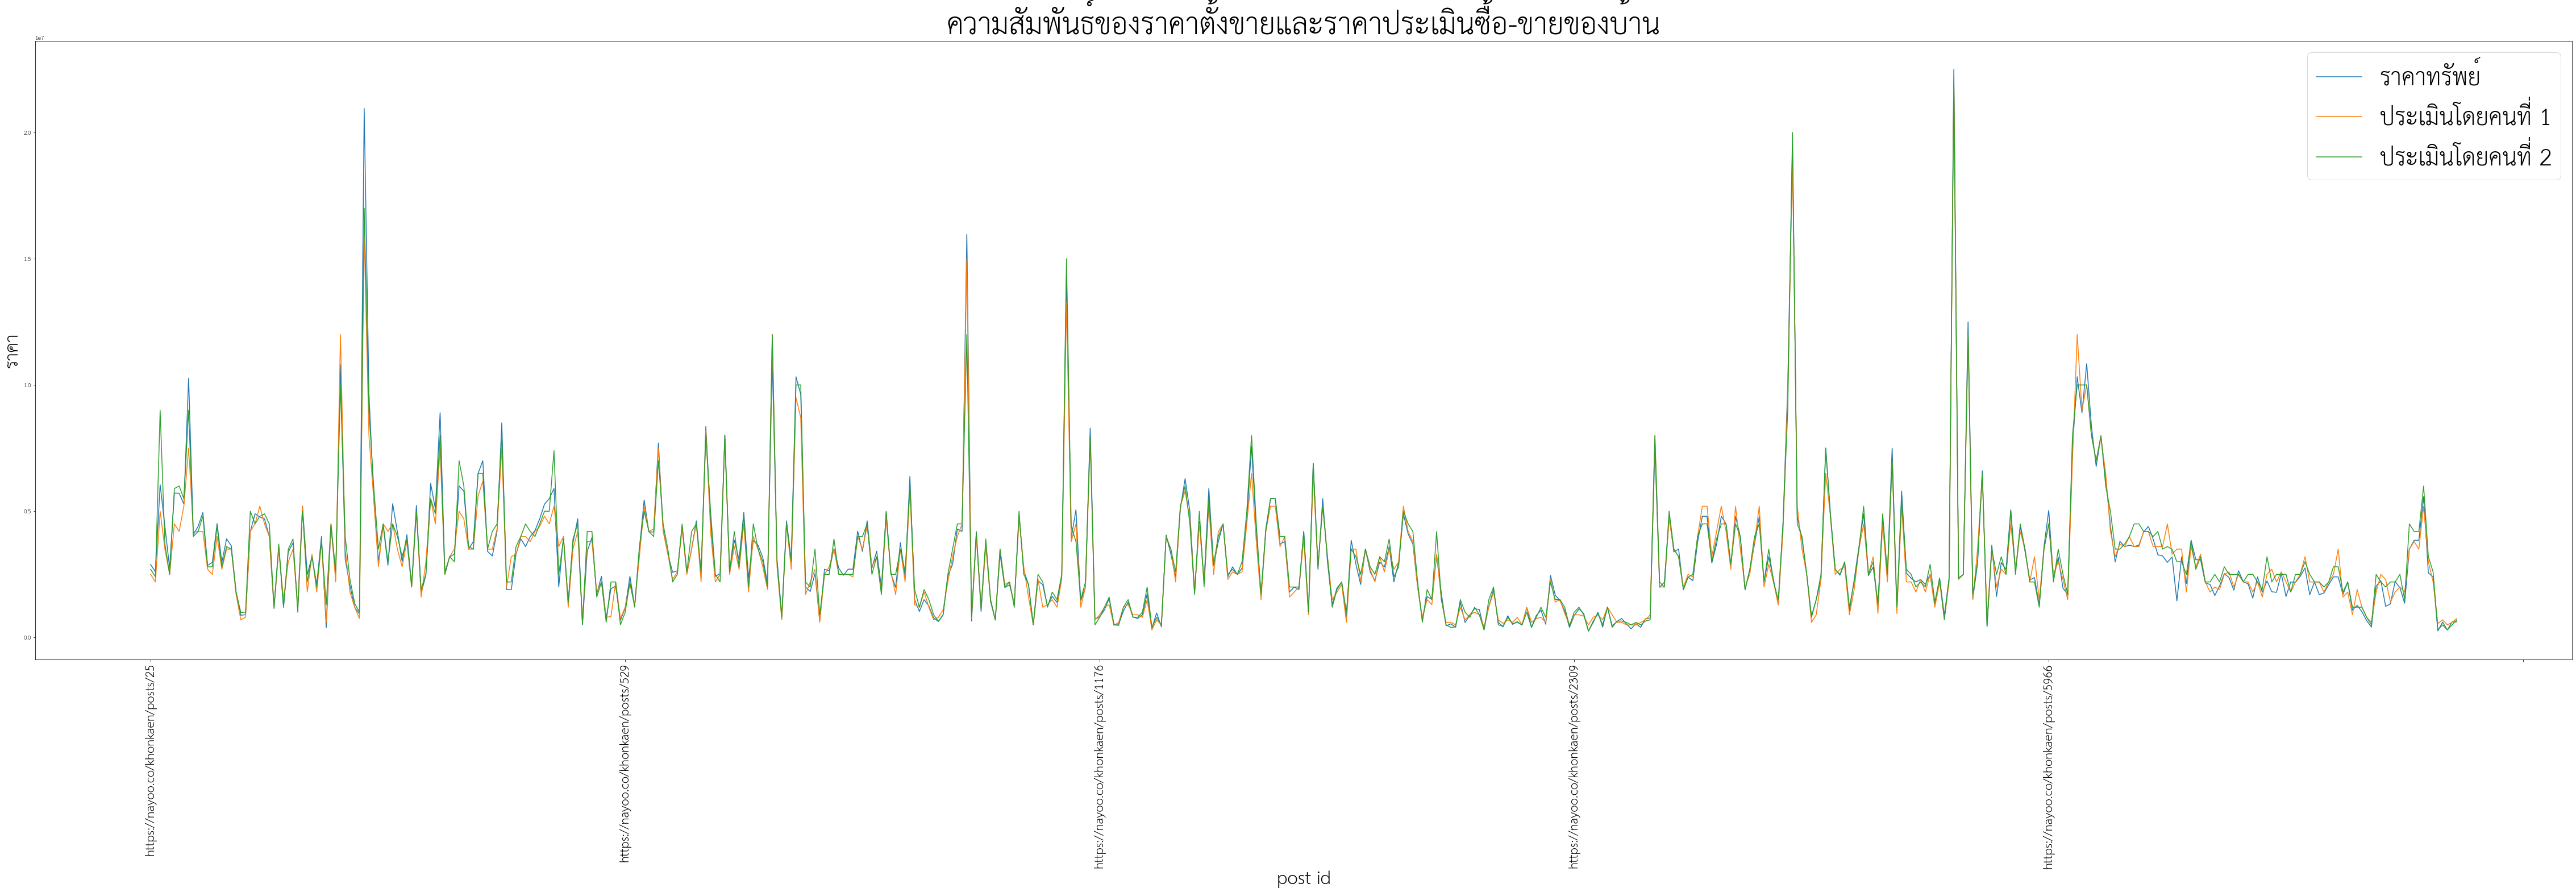

In [473]:
T_home.plot('post id',['ราคาทรัพย์','ประเมินโดยคนที่ 1', 'ประเมินโดยคนที่ 2'],figsize=(80,20))
plt.title("ความสัมพันธ์ของราคาตั้งขายและราคาประเมินซื้อ-ขายของบ้าน",fontsize=50)
plt.xticks(rotation='vertical',fontsize=20)
plt.xlabel("post id",fontsize=30)
plt.ylabel("ราคา",fontsize=30)
plt.legend(loc='upper right',fontsize=40)
plt.show()

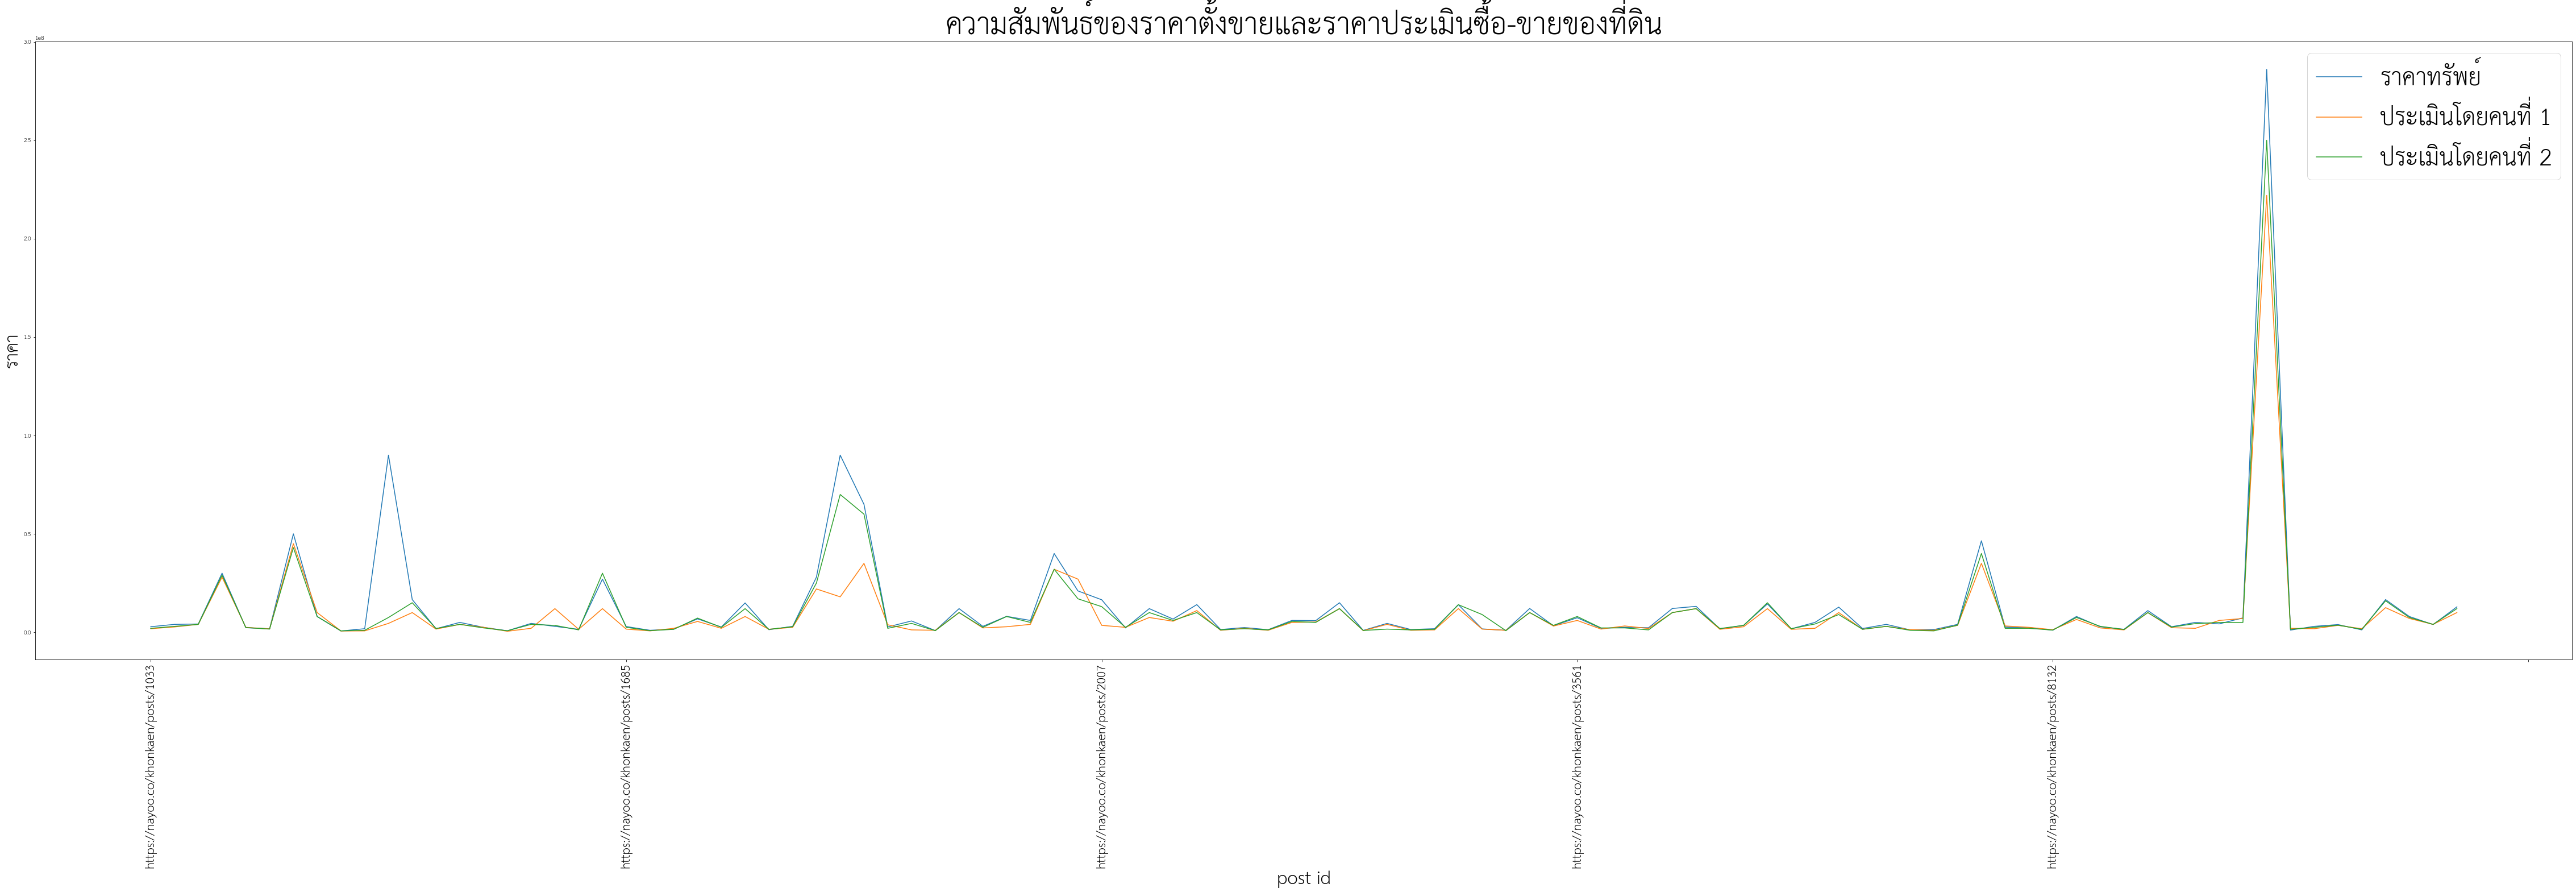

In [474]:
T_area.plot('post id',['ราคาทรัพย์','ประเมินโดยคนที่ 1', 'ประเมินโดยคนที่ 2'],figsize=(80,20))
plt.title("ความสัมพันธ์ของราคาตั้งขายและราคาประเมินซื้อ-ขายของที่ดิน",fontsize=50)
plt.xticks(rotation='vertical',fontsize=20)
plt.xlabel("post id",fontsize=30)
plt.ylabel("ราคา",fontsize=30)
plt.legend(loc='upper right',fontsize=40)
plt.show()

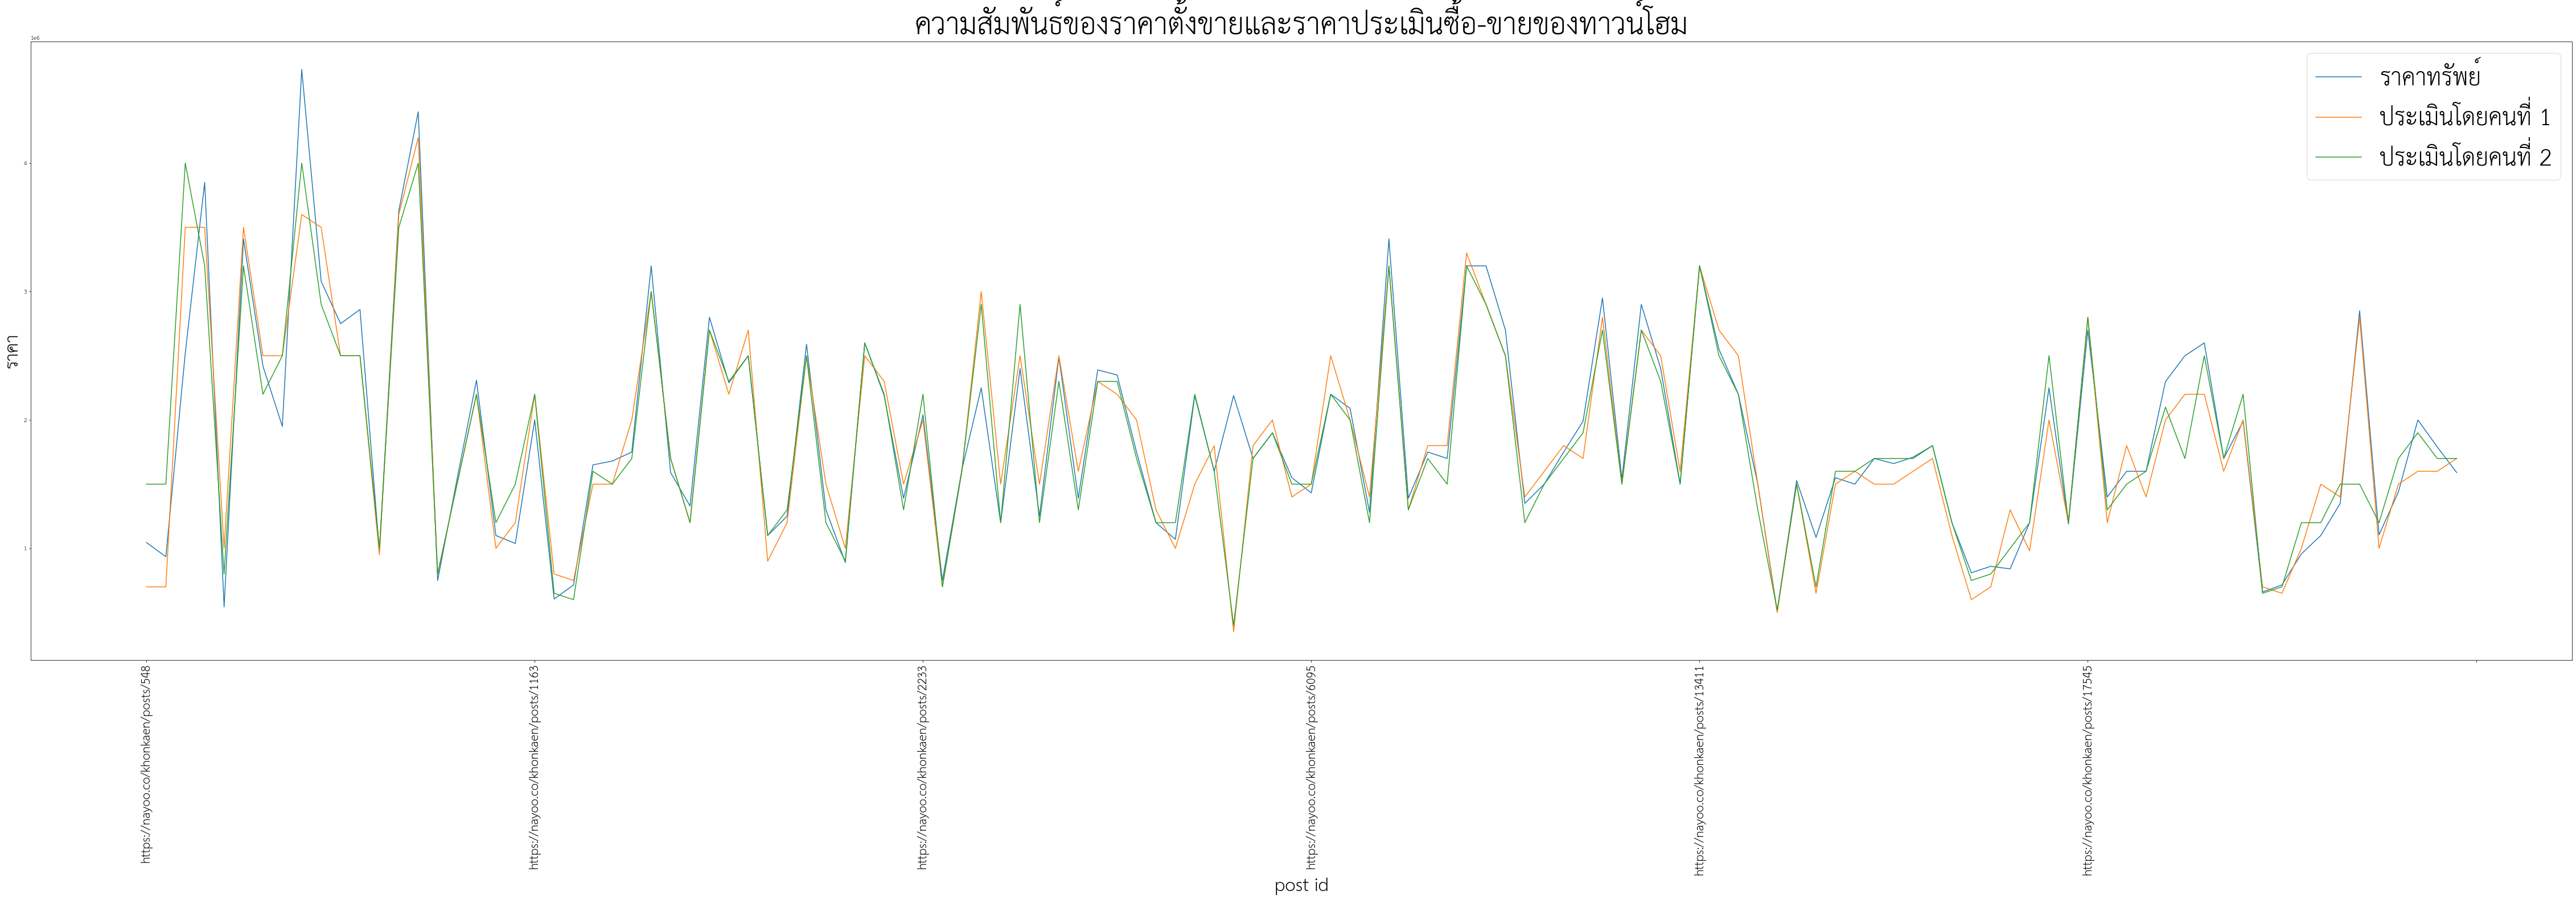

In [475]:
T_townhome.plot('post id',['ราคาทรัพย์','ประเมินโดยคนที่ 1', 'ประเมินโดยคนที่ 2'],figsize=(80,20))
plt.title("ความสัมพันธ์ของราคาตั้งขายและราคาประเมินซื้อ-ขายของทาวน์โฮม",fontsize=50)
plt.xlabel("post id",fontsize=30)
plt.ylabel("ราคา",fontsize=30)
plt.xticks(rotation='vertical',fontsize=20)
plt.legend(loc='upper right',fontsize=40)
plt.show()

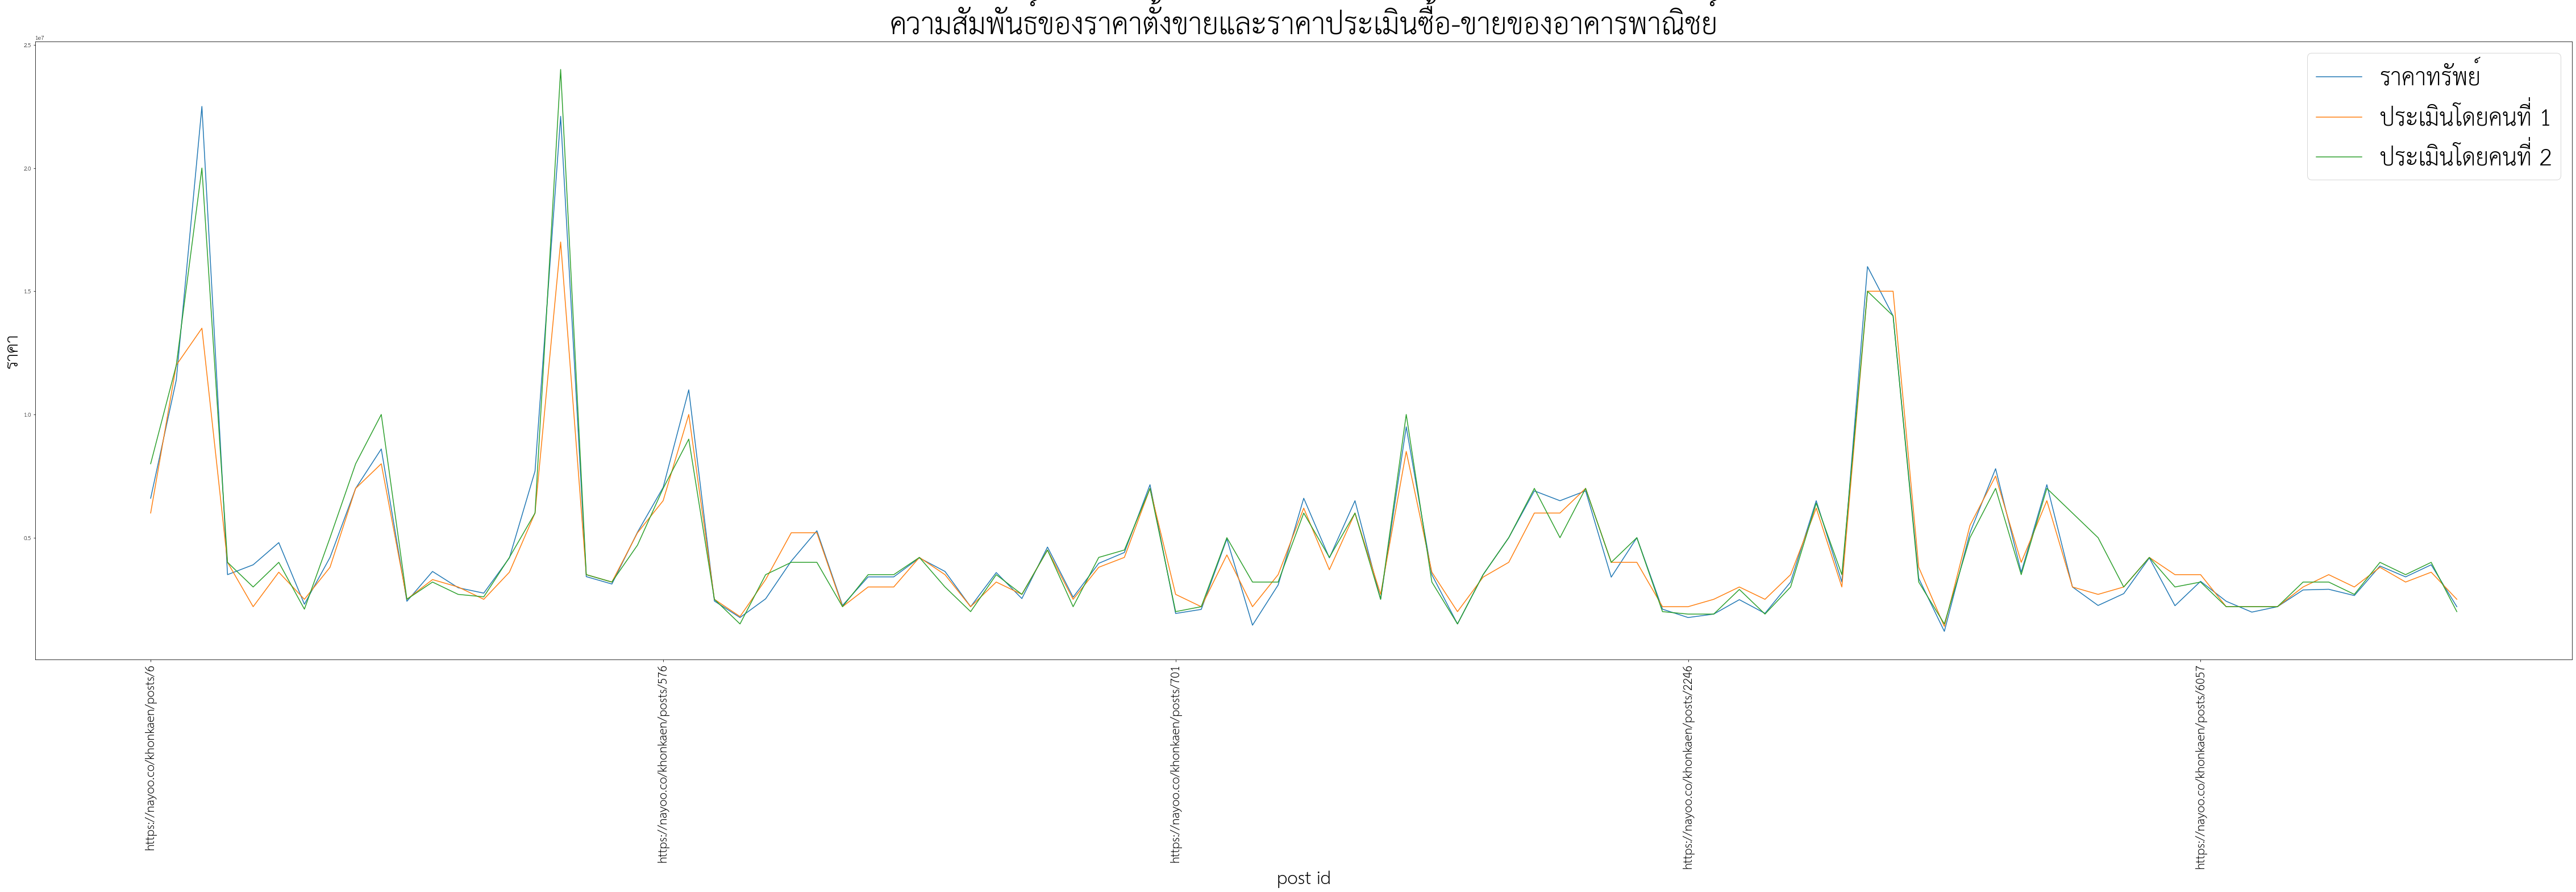

In [476]:
T_building.plot('post id',['ราคาทรัพย์','ประเมินโดยคนที่ 1', 'ประเมินโดยคนที่ 2'],figsize=(80,20))
plt.title("ความสัมพันธ์ของราคาตั้งขายและราคาประเมินซื้อ-ขายของอาคารพาณิชย์",fontsize=50)
plt.xlabel("post id",fontsize=30)
plt.ylabel("ราคา",fontsize=30)
plt.xticks(rotation='vertical',fontsize=20)
plt.legend(loc='upper right',fontsize=40)
plt.show()

## กราฟความมั่นใจในการประเมินราคาทรัพย์

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


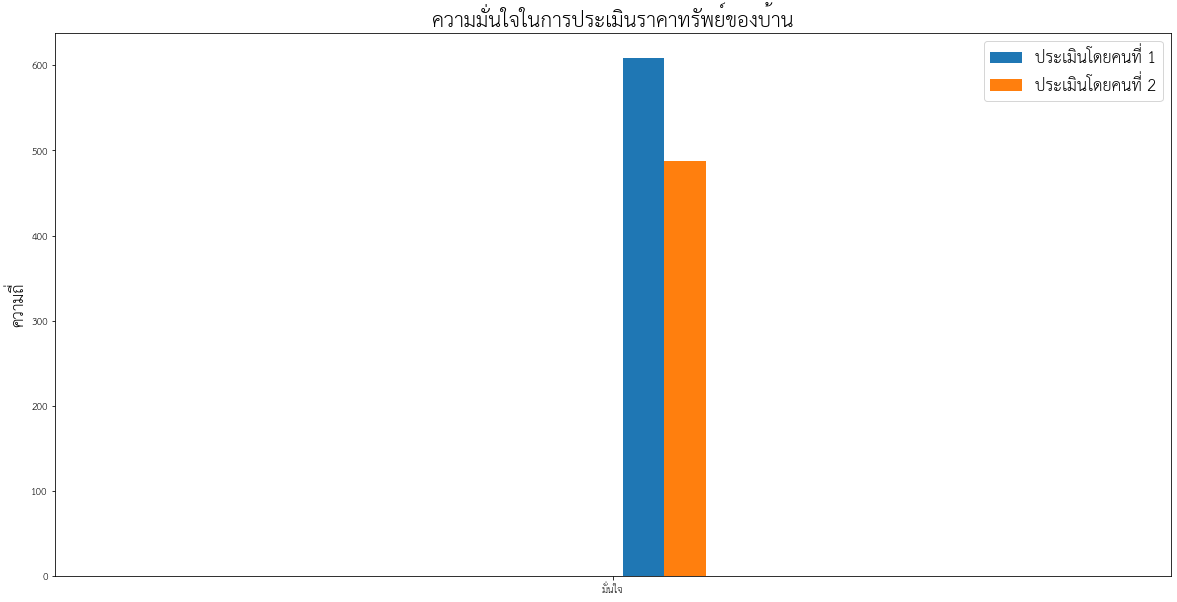

In [477]:
#บ้าน
plt.figure(figsize=(20,10));
h1 = np.array(est1['ความมั่นใจในการเมินราคาทรัพย์'])
h2 = np.array(est2['ความมั่นใจในการเมินราคาทรัพย์'])
plt.hist([h1,h2],label=['ประเมินโดยคนที่ 1', 'ประเมินโดยคนที่ 2'])
plt.legend(loc='upper right',fontsize=16)
plt.title("ความมั่นใจในการประเมินราคาทรัพย์ของบ้าน",fontsize=20)
plt.ylabel("ความถี่",fontsize=16)
plt.show();

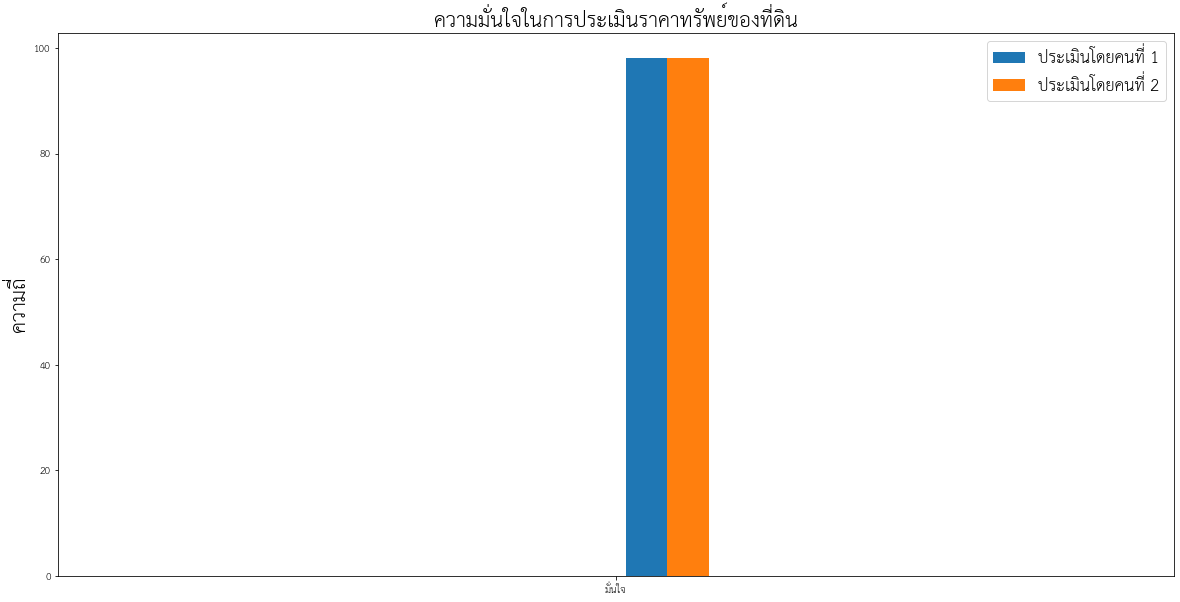

In [478]:
#ที่ดิน
plt.figure(figsize=(20,10))
a1 = np.array(area1['ความมั่นใจในการเมินราคาทรัพย์'])
a2 = np.array(area2['ความมั่นใจในการเมินราคาทรัพย์'])
plt.hist([a1,a2],label=['ประเมินโดยคนที่ 1', 'ประเมินโดยคนที่ 2'])
plt.legend(loc='upper right',fontsize=16)
plt.title("ความมั่นใจในการประเมินราคาทรัพย์ของที่ดิน",fontsize=20)
plt.ylabel("ความถี่",fontsize=20)
plt.show()

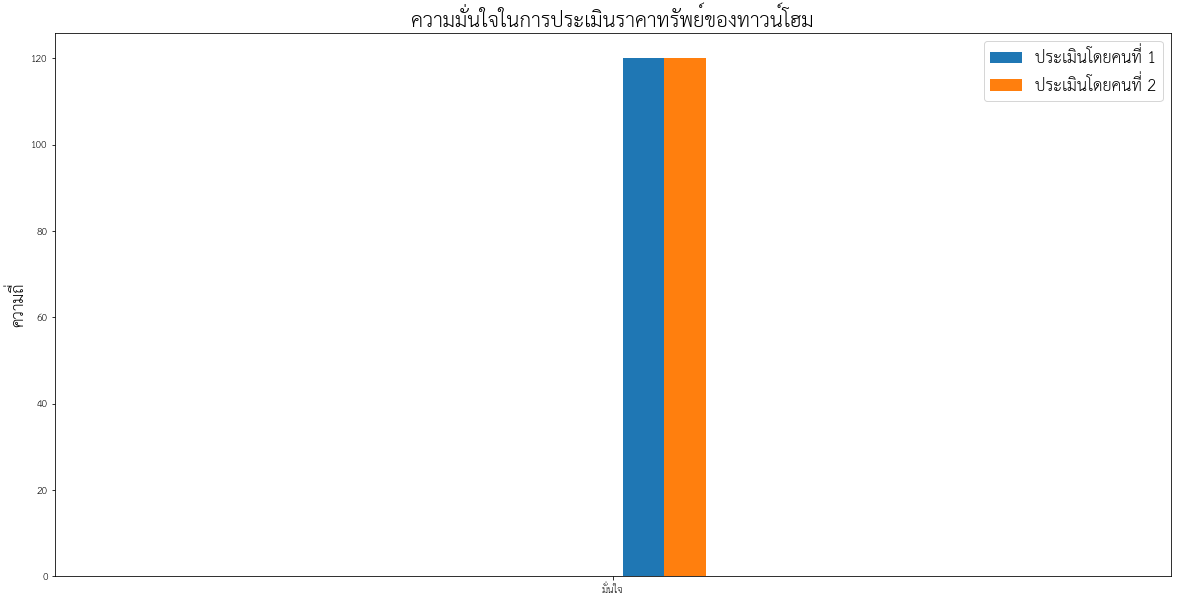

In [479]:
#ทาวน์โฮม
plt.figure(figsize=(20,10))
th_1 = np.array(th1['ความมั่นใจในการเมินราคาทรัพย์'])
th_2 = np.array(th2['ความมั่นใจในการเมินราคาทรัพย์'])
plt.hist([th_1,th_2],label=['ประเมินโดยคนที่ 1', 'ประเมินโดยคนที่ 2'])
plt.legend(loc='upper right',fontsize=16)
plt.title("ความมั่นใจในการประเมินราคาทรัพย์ของทาวน์โฮม",fontsize=20)
plt.ylabel("ความถี่",fontsize=16)
plt.show()

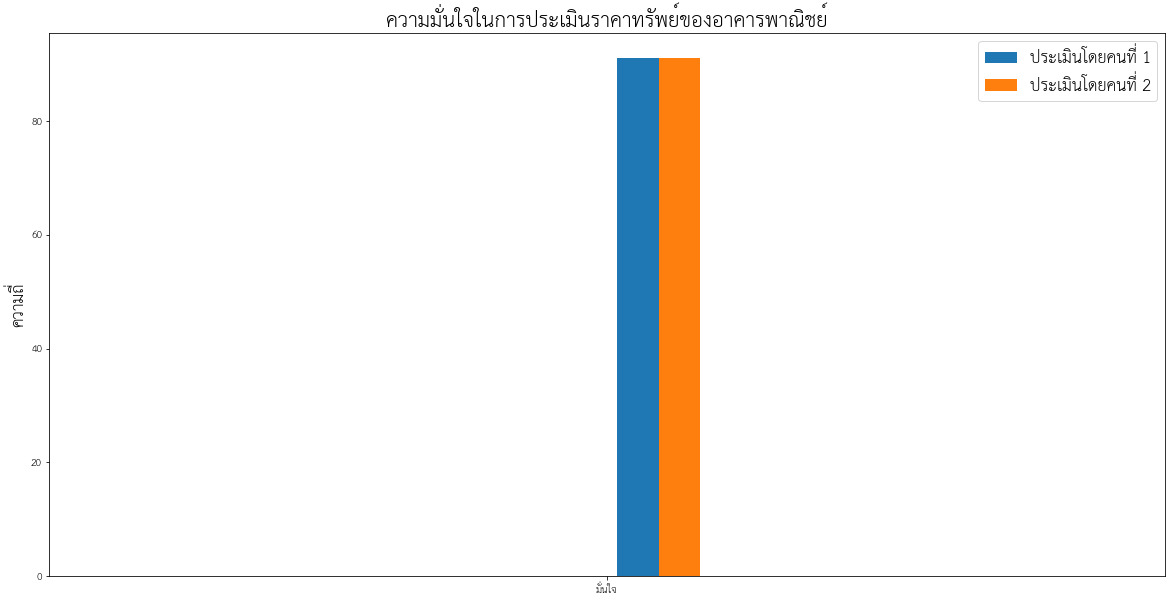

In [480]:
#อาคารพาณิชย์
plt.figure(figsize=(20,10))
bd_1 = np.array(bd1['ความมั่นใจในการเมินราคาทรัพย์'])
bd_2 = np.array(bd2['ความมั่นใจในการเมินราคาทรัพย์'])
plt.hist([bd_1,bd_2],label=['ประเมินโดยคนที่ 1', 'ประเมินโดยคนที่ 2'])
plt.legend(loc='upper right',fontsize=16)
plt.title("ความมั่นใจในการประเมินราคาทรัพย์ของอาคารพาณิชย์",fontsize=20)
plt.ylabel("ความถี่",fontsize=16)
plt.show()

## กราฟแสดงการให้คะแนนทรัพย์

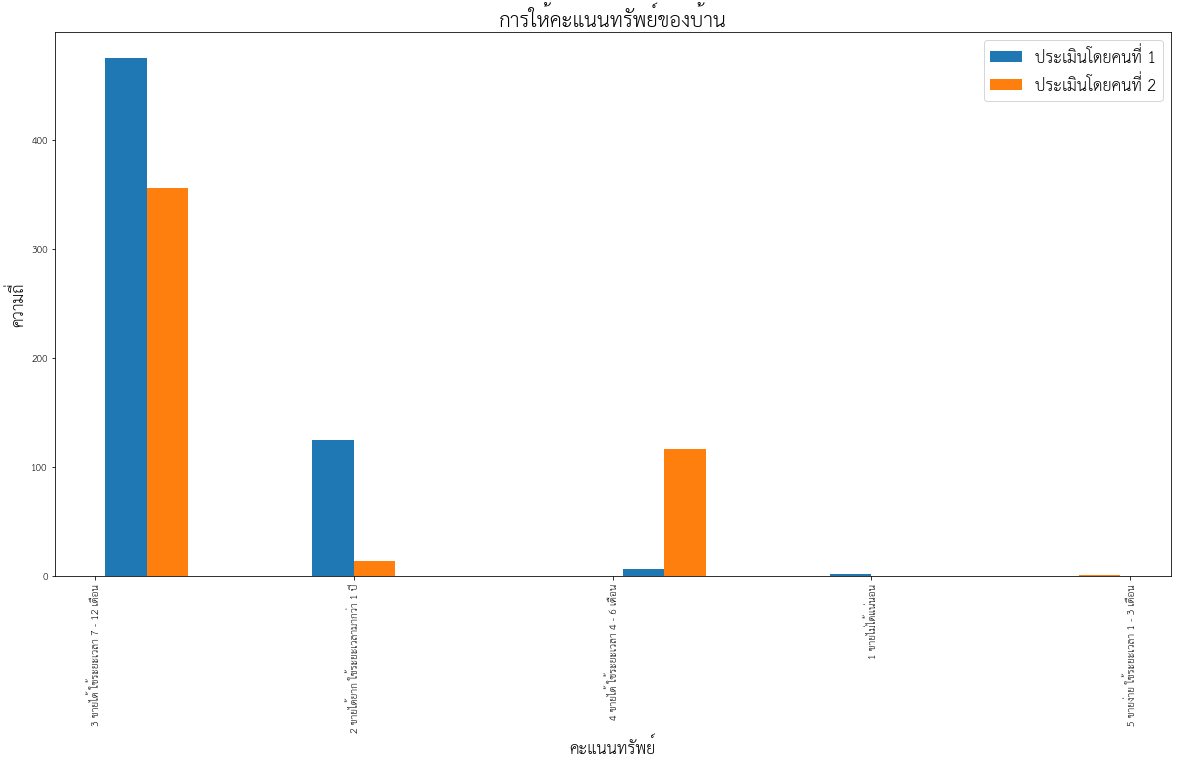

In [481]:
#บ้าน
plt.figure(figsize=(20,10))
h3 = np.array(est1['ให้คะแนนทรัพย์'])
h4 = np.array(est2['ให้คะแนนทรัพย์'])
plt.hist([h3,h4],label=['ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2'])
plt.legend(loc='upper right',fontsize=16)
plt.title("การให้คะแนนทรัพย์ของบ้าน",fontsize=20)
plt.xlabel("คะแนนทรัพย์",fontsize=16)
plt.ylabel("ความถี่",fontsize=16)
plt.xticks(rotation='vertical')
plt.show();

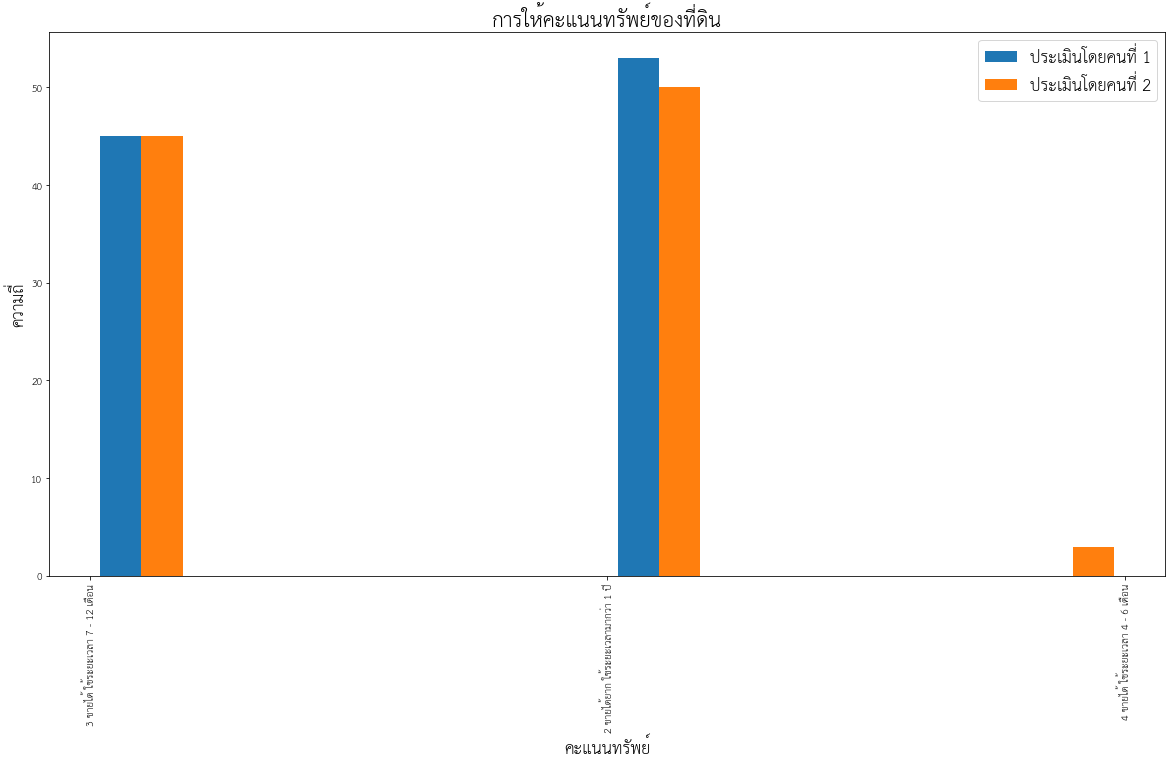

In [482]:
#ที่ดิน
plt.figure(figsize=(20,10))
a3 = np.array(area1['ให้คะแนนทรัพย์'])
a4 = np.array(area2['ให้คะแนนทรัพย์'])
plt.hist([a3,a4],label=['ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2'])
plt.legend(loc='upper right',fontsize=16)
plt.title("การให้คะแนนทรัพย์ของที่ดิน",fontsize=20)
plt.xlabel("คะแนนทรัพย์",fontsize=16)
plt.ylabel("ความถี่",fontsize=16)
plt.xticks(rotation='vertical')
plt.show();

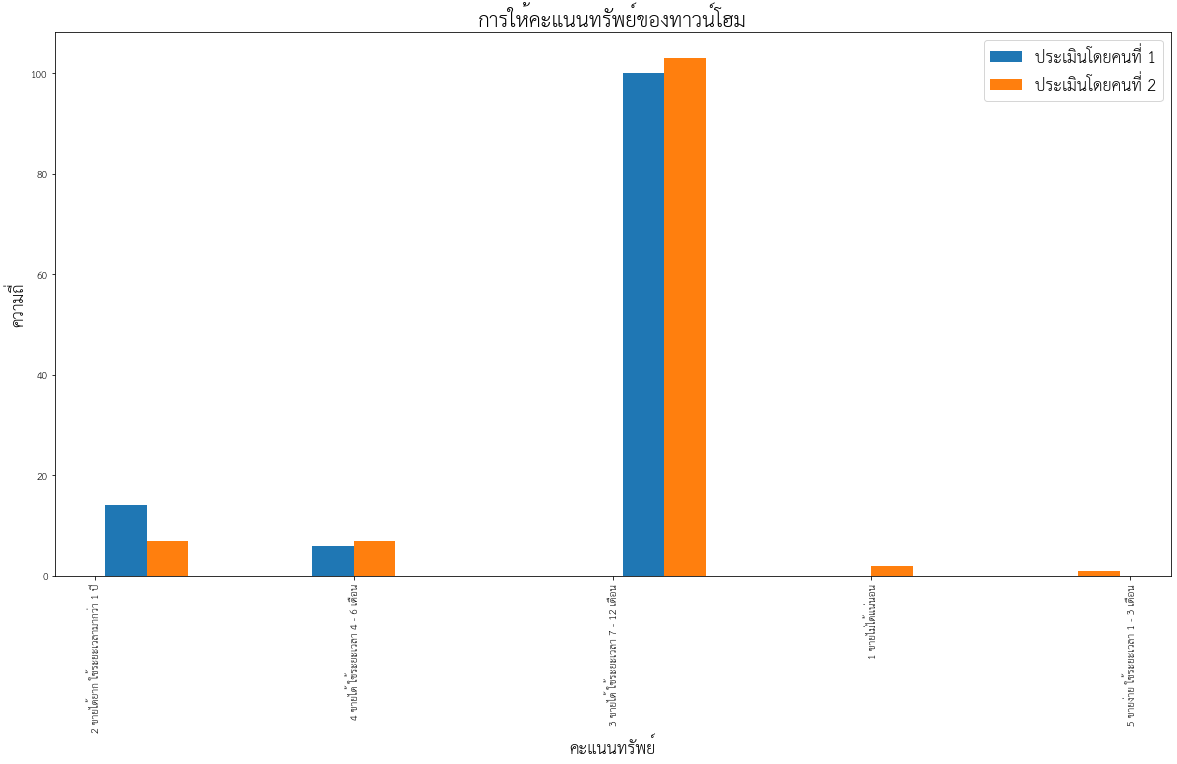

In [483]:
#ทาวน์โฮม
plt.figure(figsize=(20,10))
th_3 = np.array(th1['ให้คะแนนทรัพย์'])
th_4 = np.array(th2['ให้คะแนนทรัพย์'])
plt.hist([th_3,th_4],label=['ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2'])
plt.legend(loc='upper right',fontsize=16)
plt.title("การให้คะแนนทรัพย์ของทาวน์โฮม",fontsize=20)
plt.xlabel("คะแนนทรัพย์",fontsize=16)
plt.ylabel("ความถี่",fontsize=16)
plt.xticks(rotation='vertical')
plt.show();

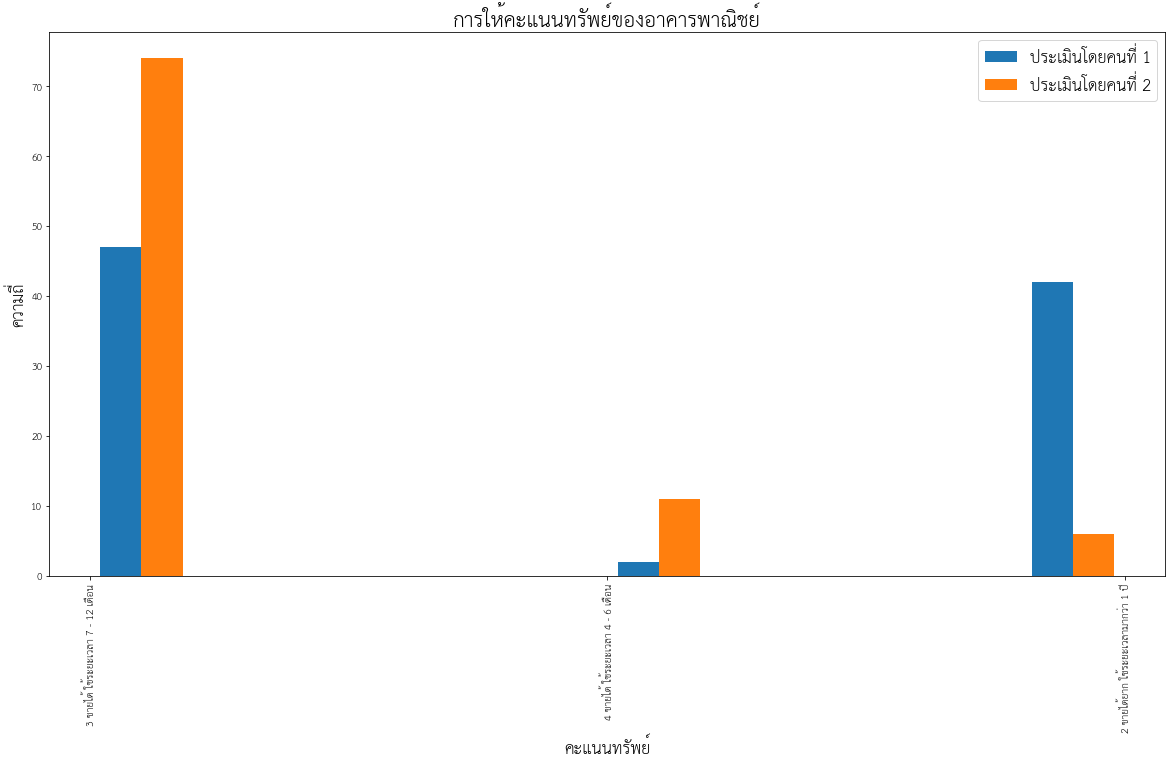

In [484]:
#อาคารพาณิชย์
plt.figure(figsize=(20,10))
bd_3 = np.array(bd1['ให้คะแนนทรัพย์'])
bd_4 = np.array(bd2['ให้คะแนนทรัพย์'])
plt.hist([bd_3,bd_4],label=['ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2'])
plt.legend(loc='upper right',fontsize=16)
plt.title("การให้คะแนนทรัพย์ของอาคารพาณิชย์",fontsize=20)
plt.xlabel("คะแนนทรัพย์",fontsize=16)
plt.ylabel("ความถี่",fontsize=16)
plt.xticks(rotation='vertical')
plt.show();